Importing Library

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

Reading Dataset

In [2]:
df = pd.read_csv('./shopping_behavior_updated.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [4]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [5]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [6]:
print(f'Duplicate rows: {df.duplicated().sum()}')

Duplicate rows: 0


Data Visualization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

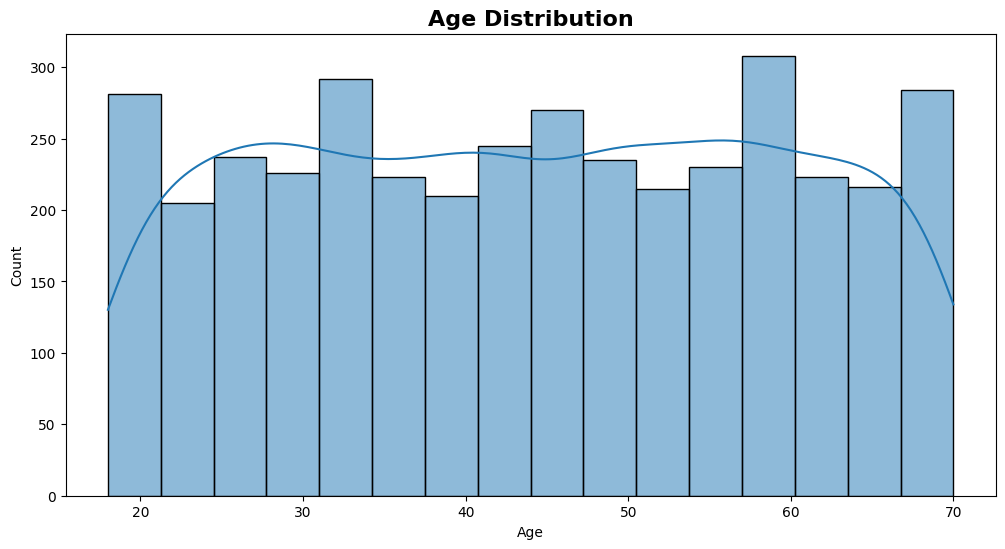

In [8]:
plt.figure(figsize=(12,6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution', weight='bold', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

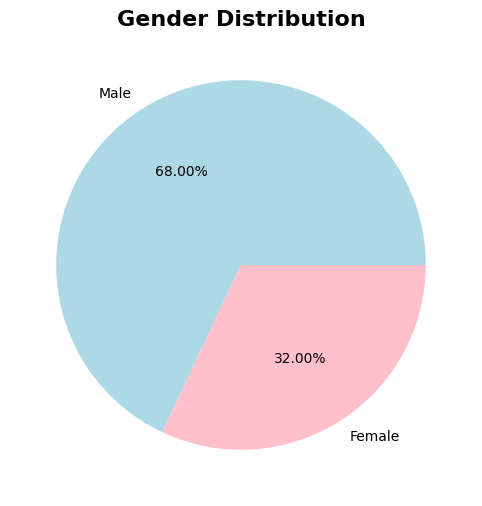

In [9]:
plt.figure(figsize=(12, 6))
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].unique(), autopct='%1.2f%%', colors=['lightblue', 'pink'])
plt.title('Gender Distribution', weight='bold', fontsize=16)
plt.show()

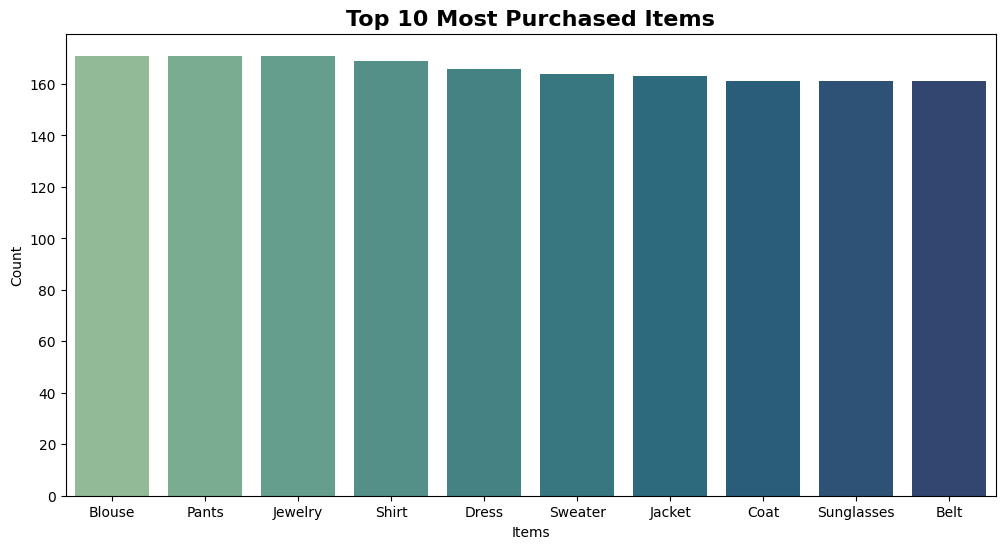

In [10]:
top_10_items = df['Item Purchased'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x = top_10_items.index, y = top_10_items.values, palette='crest')
plt.title("Top 10 Most Purchased Items", weight='bold', fontsize=16)
plt.xlabel("Items")
plt.ylabel("Count")
plt.show()

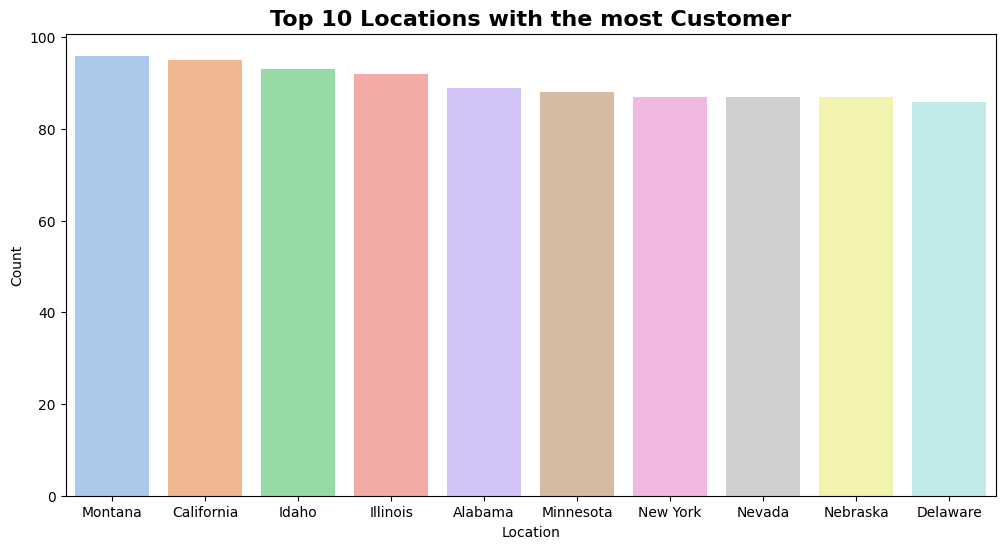

In [11]:
top_10_location = df['Location'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x = top_10_location.index, y = top_10_location.values, palette='pastel')
plt.title("Top 10 Locations with the most Customer", weight='bold', fontsize=16)
plt.xlabel("Location")
plt.ylabel("Count")
plt.show()

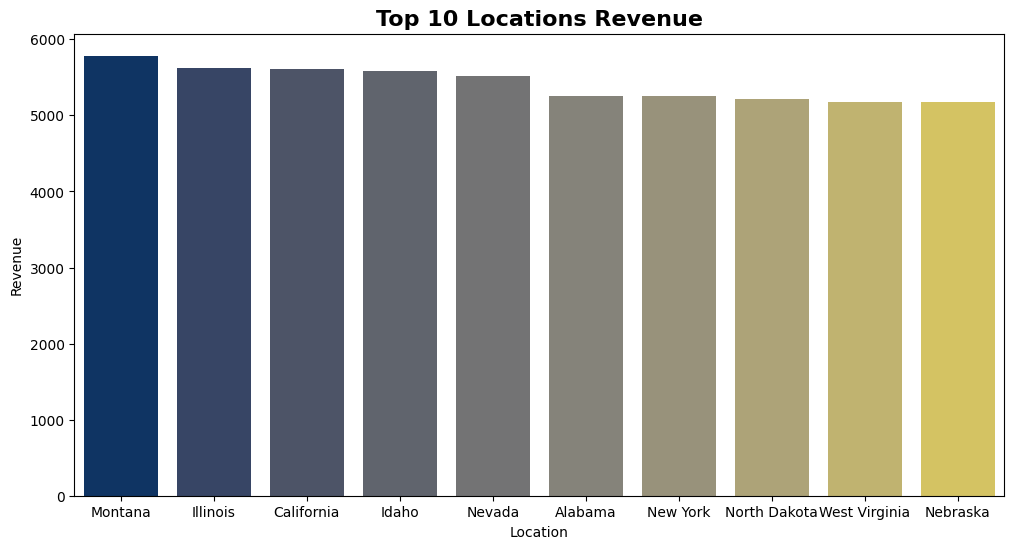

In [12]:
top_10_location_buyed = df.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x = top_10_location_buyed.index, y = top_10_location_buyed.values, palette='cividis')
plt.title("Top 10 Locations Revenue", weight='bold', fontsize=16)
plt.xlabel("Location")
plt.ylabel("Revenue")
plt.show()

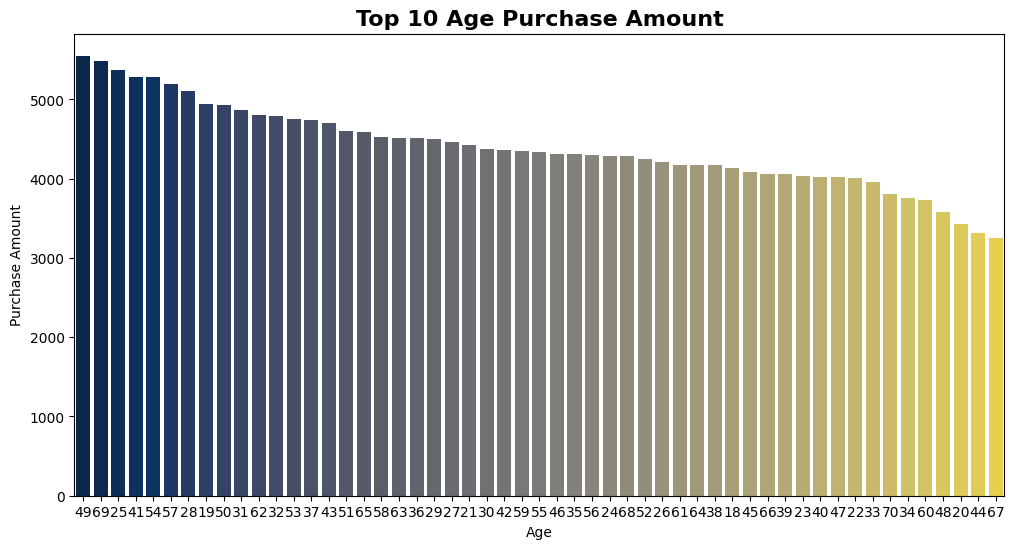

In [13]:
top_10_age_buyed = df.groupby('Age')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x = top_10_age_buyed.index, y = top_10_age_buyed.values, order=top_10_age_buyed.index, palette='cividis')
plt.title("Top 10 Age Purchase Amount", weight='bold', fontsize=16)
plt.xlabel("Age")
plt.ylabel("Purchase Amount")
plt.show()

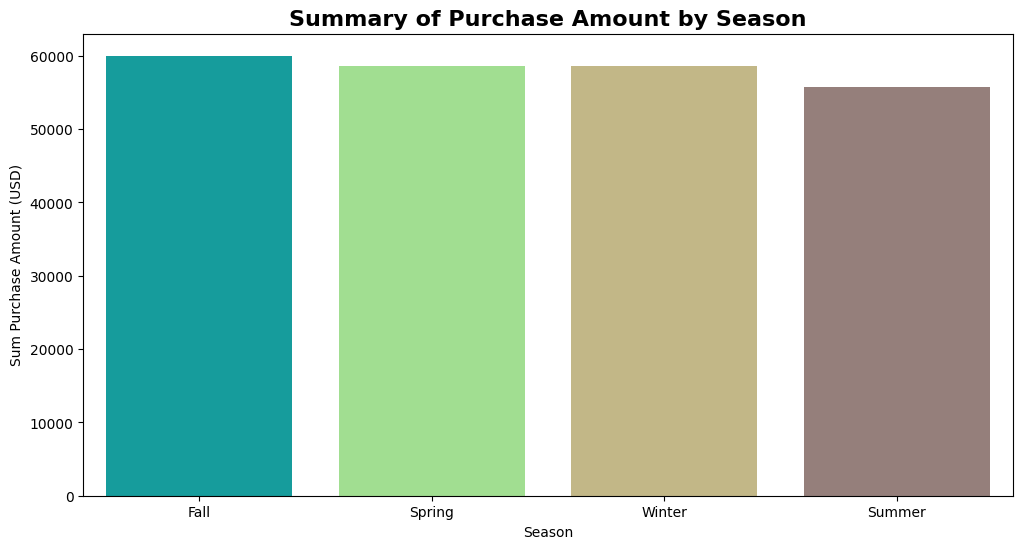

In [14]:
season_avg = df.groupby('Season')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=season_avg.index, y=season_avg.values, palette='terrain')
plt.title("Summary of Purchase Amount by Season", weight='bold', fontsize=16)
plt.ylabel("Sum Purchase Amount (USD)")
plt.xlabel("Season")
plt.show()

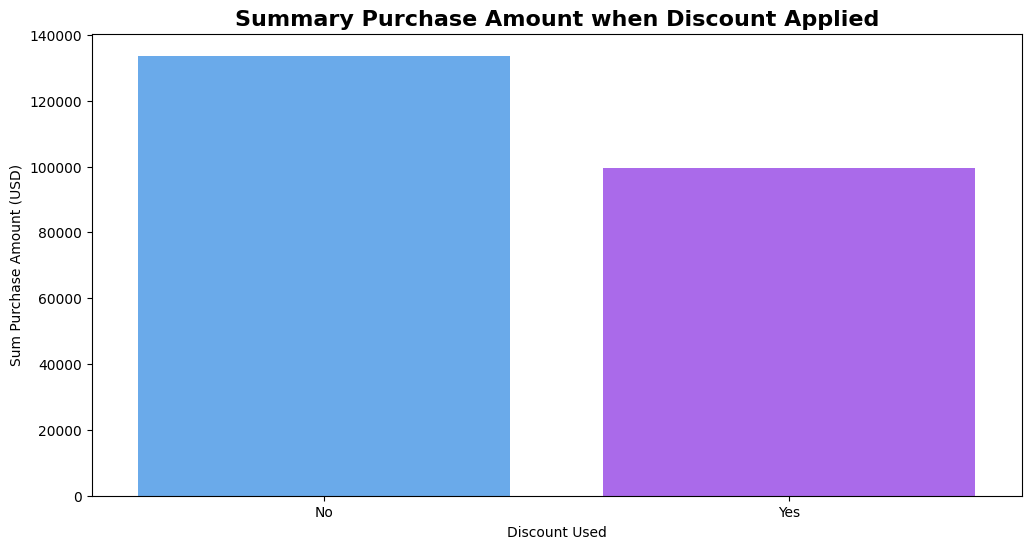

In [15]:
discount_applied = df.groupby('Discount Applied')['Purchase Amount (USD)'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=discount_applied.index, y=discount_applied.values, palette='cool')
plt.title("Summary Purchase Amount when Discount Applied", weight='bold', fontsize=16)
plt.ylabel("Sum Purchase Amount (USD)")
plt.xlabel("Discount Used")
plt.show()

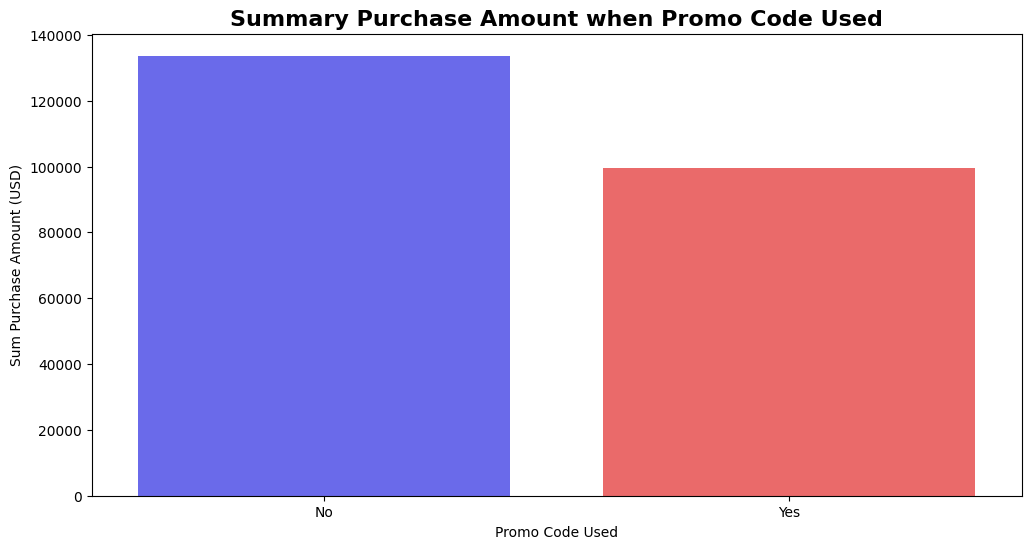

In [16]:
promo_used = df.groupby('Promo Code Used')['Purchase Amount (USD)'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=promo_used.index, y=promo_used.values, palette='seismic')
plt.title("Summary Purchase Amount when Promo Code Used", weight='bold', fontsize=16)
plt.ylabel("Sum Purchase Amount (USD)")
plt.xlabel("Promo Code Used")
plt.show()

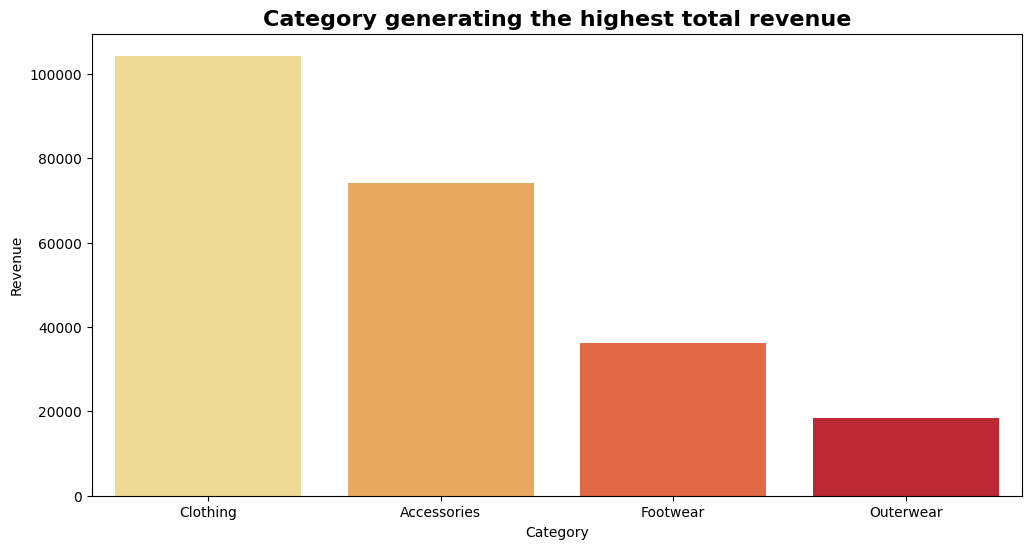

In [17]:
highest_revenue_category = df.groupby("Category")["Purchase Amount (USD)"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=highest_revenue_category.index, y=highest_revenue_category.values, palette='YlOrRd')
plt.title("Category generating the highest total revenue", weight='bold',fontsize=16)
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.show()

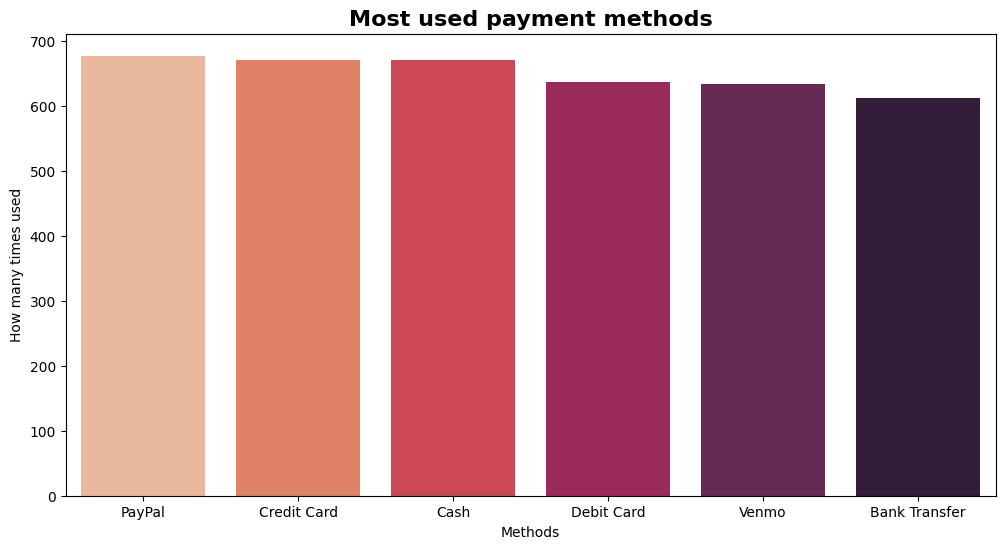

In [18]:
most_used_payment_method = df['Payment Method'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=most_used_payment_method.index, y=most_used_payment_method.values, palette='rocket_r')
plt.title("Most used payment methods", weight='bold',fontsize=16)
plt.xlabel('Methods')
plt.ylabel('How many times used')
plt.show()

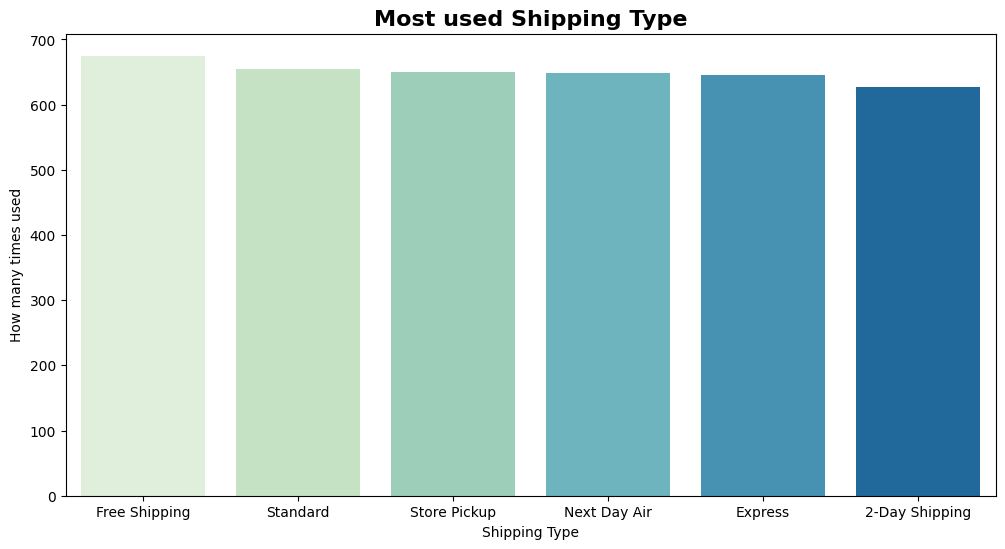

In [19]:
most_used_payment_method = df['Shipping Type'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=most_used_payment_method.index, y=most_used_payment_method.values, palette='GnBu')
plt.title("Most used Shipping Type", weight='bold',fontsize=16)
plt.xlabel('Shipping Type')
plt.ylabel('How many times used')
plt.show()

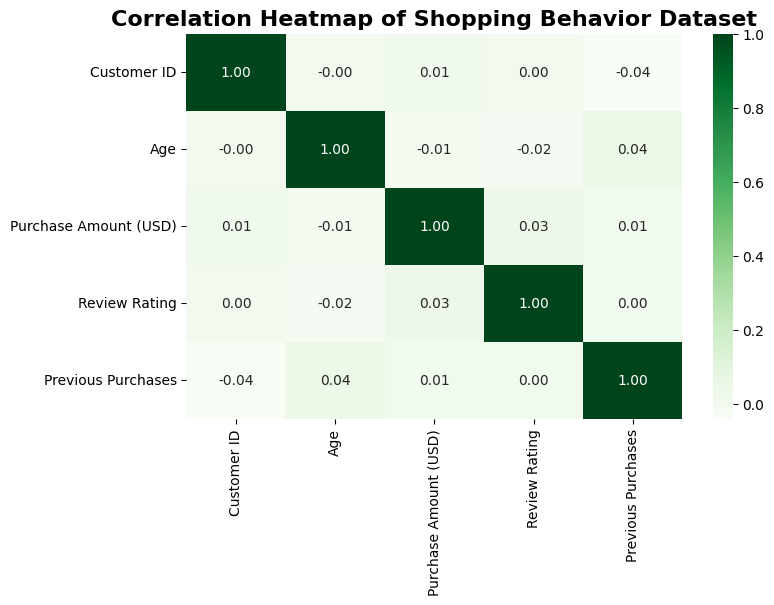

In [20]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Greens", fmt=".2f")
plt.title("Correlation Heatmap of Shopping Behavior Dataset", weight='bold', fontsize=16)
plt.show()

## Key Insights from Customer Behavior Visualization

##### Clothing and Accessories dominate sales volume, making them the most impactful categories for driving revenue and marketing focus.

##### Customer count does not directly correlate with spending. Although certain locations have a high number of customers, the total purchase amount varies significantly, indicating that revenue is strongly influenced by customer purchasing power rather than footfall alone.

##### Customers aged 35 and above contribute the highest spending, suggesting they are a valuable segment for targeted promotions and retention strategies.

##### Summer season shows noticeably lower purchase activity, which may reflect seasonal buying patterns or advanced pre-season purchases. Other seasons generate consistently higher sales.

##### Discounts and promo codes have a strong positive effect on purchase amount, showing that promotional strategies effectively boost customer spending.

##### Free shipping remains the most frequently selected option, indicating that shipping cost is still a major factor influencing customer decisions.

##### All payment methods are used by customers, with no single method overwhelmingly dominating, meaning flexibility in payment options continues to support overall customer convenience.

##### Gender and category trends show clear preferences, indicating opportunities for targeted marketing and inventory planning.

##### The correlation heatmap shows that the numerical features in the dataset (Age, Purchase Amount, Review Rating, Previous Purchases) have very weak linear relationships with each other. This indicates that these variables do not directly influence one another in a linear manner.

##### However, because most of the important features in this dataset are categorical (e.g., Category, Location, Season, Discount Applied), the heatmap does not fully capture the underlying behavior patterns. To uncover meaningful relationships, additional techniques such as one-hot encoding, chi-square analysis, or feature importance from machine learning models will provide more actionable insights.

Splitting Data

In [21]:
df['Frequency of Purchases'].value_counts()

Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop(['Frequency of Purchases', 'Customer ID'], axis=1)
y = df['Frequency of Purchases']

X_train, X_test, y_train, y_test = train_test_split(X, y)

Training

In [30]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Frequency of Purchases')
categorical_cols

['Gender',
 'Item Purchased',
 'Category',
 'Location',
 'Size',
 'Color',
 'Season',
 'Subscription Status',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Payment Method']

In [31]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    depth=8,
    learning_rate=0.05,
    loss_function='MultiClass',
    random_seed=42,
    verbose=False
)

model.fit(X_train, y_train, cat_features=categorical_cols)


Evaluate

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

preds = model.predict(X_test)
print(classification_report(y_test, preds))

                precision    recall  f1-score   support

      Annually       0.16      0.15      0.16       136
     Bi-Weekly       0.17      0.12      0.14       147
Every 3 Months       0.17      0.21      0.19       144
   Fortnightly       0.12      0.16      0.14       133
       Monthly       0.17      0.23      0.19       134
     Quarterly       0.16      0.06      0.09       151
        Weekly       0.13      0.15      0.14       130

      accuracy                           0.15       975
     macro avg       0.15      0.15      0.15       975
  weighted avg       0.15      0.15      0.15       975



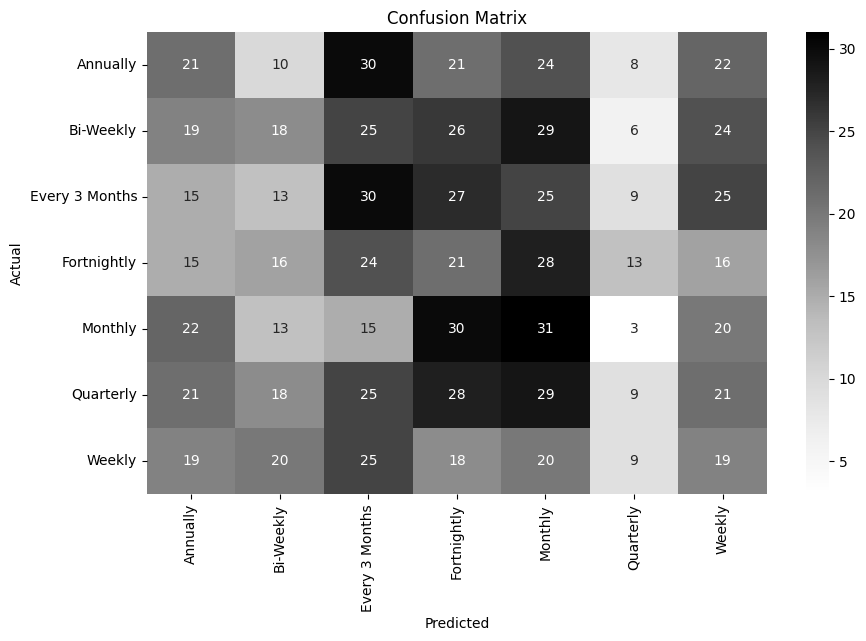

In [49]:
cm = confusion_matrix(y_test, preds)

labels = sorted(y_test.unique())

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greys', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Hyperparameter Tuning

In [45]:
from sklearn.model_selection import RandomizedSearchCV

grid = {
    'depth': [4, 6],
    'learning_rate': [0.03],
    'iterations': [500, 1000]
}

model2 = CatBoostClassifier(verbose=False, random_seed=42)
random_search = RandomizedSearchCV(model2, grid, cv=3, n_iter=4, random_state=42)
random_search.fit(X_train, y_train, cat_features=categorical_cols)

print(f"Best parameters: {random_search.best_params_}")
print(f"Best CV score: {random_search.best_score_}")

Best parameters: {'learning_rate': 0.03, 'iterations': 1000, 'depth': 6}
Best CV score: 0.145982905982906


In [46]:
preds2 = random_search.best_estimator_.predict(X_test)
print(classification_report(y_test, preds2))

                precision    recall  f1-score   support

      Annually       0.10      0.10      0.10       136
     Bi-Weekly       0.19      0.14      0.16       147
Every 3 Months       0.14      0.17      0.16       144
   Fortnightly       0.17      0.20      0.18       133
       Monthly       0.14      0.22      0.17       134
     Quarterly       0.22      0.09      0.12       151
        Weekly       0.12      0.12      0.12       130

      accuracy                           0.15       975
     macro avg       0.15      0.15      0.14       975
  weighted avg       0.16      0.15      0.14       975



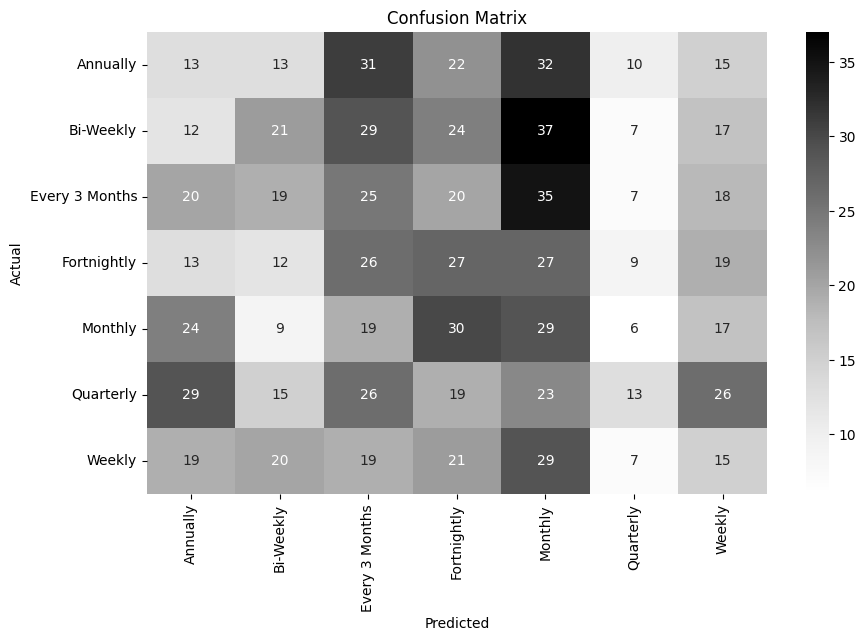

In [50]:
cm = confusion_matrix(y_test, preds2)

labels = sorted(y_test.unique())

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greys', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Save Model

In [51]:
import pickle

with open('best_model.pkl', 'wb') as f:
    pickle.dump(random_search.best_estimator_, f)

print("Model saved as 'best_model.pkl'")

Model saved as 'best_model.pkl'


Load Model

In [52]:
with open('best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
    
print("Model loaded")
print(f"Model type: {type(loaded_model)}")

Model loaded
Model type: <class 'catboost.core.CatBoostClassifier'>


Predicting with Saved Model

In [66]:
sample_data = X_test.head(5)

predictions = loaded_model.predict(sample_data)
probabilities = loaded_model.predict_proba(sample_data)

class_labels = sorted(y_test.unique())

print("Prediction Results")

for i, pred in enumerate(predictions):
    print(f"\nSample {i+1}: Predicted Class = {pred}")
    print("_" * 80)
    
    probs = probabilities[i]
    
    prob_dict = {label: prob for label, prob in zip(class_labels, probs)}
    
    highest_class = max(prob_dict, key=prob_dict.get)
    highest_prob = prob_dict[highest_class]
    
    for label, prob in prob_dict.items():
        percentage = prob * 100
        print(f"  {label:15s}: {percentage:6.2f}%")
    

Prediction Results

Sample 1: Predicted Class = ['Every 3 Months']
________________________________________________________________________________
  Annually       :  17.67%
  Bi-Weekly      :  16.78%
  Every 3 Months :  20.57%
  Fortnightly    :  10.44%
  Monthly        :   9.78%
  Quarterly      :  12.94%
  Weekly         :  11.82%

Sample 2: Predicted Class = ['Every 3 Months']
________________________________________________________________________________
  Annually       :  16.29%
  Bi-Weekly      :  10.33%
  Every 3 Months :  18.96%
  Fortnightly    :  11.36%
  Monthly        :  16.97%
  Quarterly      :   9.94%
  Weekly         :  16.15%

Sample 3: Predicted Class = ['Annually']
________________________________________________________________________________
  Annually       :  17.78%
  Bi-Weekly      :   9.68%
  Every 3 Months :  14.44%
  Fortnightly    :  16.55%
  Monthly        :  17.51%
  Quarterly      :   8.11%
  Weekly         :  15.93%

Sample 4: Predicted Class = ['We